In [48]:
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler,RobustScaler
from scipy import stats
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time
import itertools

In [49]:
df1 = pd.read_csv("17.용인시_소상공인_매출정보.csv")
csv2 = pd.read_csv('2.용인시_상권_업종코드.csv')

In [50]:
#업체 변수를 이진법 숫자로 변환
df1[["indcd_a_yn","indcd_b_yn","indcd_c_yn","indcd_d_yn","indcd_e_yn","indcd_f_yn","indcd_g_yn","indcd_h_yn","indcd_i_yn","indcd_j_yn","indcd_k_yn","indcd_l_yn","indcd_m_yn","indcd_n_yn","indcd_o_yn","indcd_p_yn","indcd_q_yn","indcd_r_yn","indcd_s_yn","indcd_t_yn","indcd_u_yn"]] = df1[["indcd_a_yn","indcd_b_yn","indcd_c_yn","indcd_d_yn","indcd_e_yn","indcd_f_yn","indcd_g_yn","indcd_h_yn","indcd_i_yn","indcd_j_yn","indcd_k_yn","indcd_l_yn","indcd_m_yn","indcd_n_yn","indcd_o_yn","indcd_p_yn","indcd_q_yn","indcd_r_yn","indcd_s_yn","indcd_t_yn","indcd_u_yn"]].replace('Y', 1)
df1[["indcd_a_yn","indcd_b_yn","indcd_c_yn","indcd_d_yn","indcd_e_yn","indcd_f_yn","indcd_g_yn","indcd_h_yn","indcd_i_yn","indcd_j_yn","indcd_k_yn","indcd_l_yn","indcd_m_yn","indcd_n_yn","indcd_o_yn","indcd_p_yn","indcd_q_yn","indcd_r_yn","indcd_s_yn","indcd_t_yn","indcd_u_yn"]] = df1[["indcd_a_yn","indcd_b_yn","indcd_c_yn","indcd_d_yn","indcd_e_yn","indcd_f_yn","indcd_g_yn","indcd_h_yn","indcd_i_yn","indcd_j_yn","indcd_k_yn","indcd_l_yn","indcd_m_yn","indcd_n_yn","indcd_o_yn","indcd_p_yn","indcd_q_yn","indcd_r_yn","indcd_s_yn","indcd_t_yn","indcd_u_yn"]].replace(np.nan, 0)
df1

,gid,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,...,indcd_l_yn,indcd_m_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,indcd_s_yn,indcd_t_yn,indcd_u_yn
0,다바67bb99aa,1,0,0,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,다바68aa99ba,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,다바68aa99bb,5,0,1,0,0,0,4,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,다바68ab99ba,3,0,0,1,0,2,0,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,다바68ba99ab,16,0,1,2,3,2,8,0,13,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,다사92ab02bb,1,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2253,다사92ab03aa,2,0,0,0,0,1,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2254,다사92ab04ab,1,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2255,다사92ab05ab,2,0,1,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data1 = df1.iloc[:,23:38]
data1

,sales_est_amt_201703,sales_est_amt_201706,sales_est_amt_201709,sales_est_amt_201712,sales_est_amt_201803,sales_est_amt_201806,sales_est_amt_201809,sales_est_amt_201812,sales_est_amt_201903,sales_est_amt_201906,sales_est_amt_201909,sales_est_amt_201912,sales_est_amt_202003,sales_est_amt_202006,sales_est_amt_202009
0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,199
1,0,0,0,32,345,564,888,1187,699,822,716,601,565,502,391
2,1682,2016,2029,2147,1627,1876,2062,2388,2610,3469,3012,3377,2458,3648,3065
3,553,475,534,351,456,556,814,860,465,602,495,933,613,862,598
4,2563,4032,4905,5499,4656,5983,6687,5795,4834,6117,5642,5016,4991,6084,5929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0,0,0,10,5,23,87,21,0,5,33,4,3,0,3
2253,261,52,0,0,0,0,0,29,65,0,7,0,0,0,29
2254,1097,1006,798,1625,1329,816,896,1101,1252,1587,2049,1020,1645,585,784
2255,0,0,0,0,0,54,0,0,40,93,154,92,121,124,166


In [52]:
df1['mean_sales']=data1.mean(axis=1, skipna=False)
df1['mean_sales']

0         17.066667
1        487.466667
2       2497.733333
3        611.133333
4       5248.866667
           ...     
2252      12.933333
2253      29.533333
2254    1172.666667
2255      56.266667
2256     211.333333
Name: mean_sales, Length: 2257, dtype: float64

In [53]:
#분석에 사용되지 않는 정보는 삭제합니다.
df1_ = df1.dropna().drop(['gid','indcd_a_yn','indcd_b_yn','indcd_c_yn','indcd_e_yn','indcd_g_yn','indcd_h_yn','indcd_i_yn','indcd_j_yn','indcd_k_yn','indcd_m_yn','indcd_s_yn','indcd_t_yn','indcd_u_yn',
   'sales_est_amt_201703','sales_est_amt_201706','sales_est_amt_201709','sales_est_amt_201712','sales_est_amt_201803','sales_est_amt_201806','sales_est_amt_201809','sales_est_amt_201812','sales_est_amt_201903','sales_est_amt_201906','sales_est_amt_201909','sales_est_amt_201912','sales_est_amt_202003','sales_est_amt_202006','sales_est_amt_202009'], axis=1, inplace=False)

In [54]:
df1_

,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,...,age70_ratio,indcd_d_yn,indcd_f_yn,indcd_l_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,mean_sales
0,1,0,0,0,0,0,1,0,1,1,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.066667
1,1,0,0,0,1,0,0,0,0,1,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,487.466667
2,5,0,1,0,0,0,4,0,3,4,...,2.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2497.733333
3,3,0,0,1,0,2,0,0,3,0,...,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,611.133333
4,16,0,1,2,3,2,8,0,13,8,...,0.82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5248.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,1,0,0,0,1,0,0,0,1,0,...,6.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.933333
2253,2,0,0,0,0,1,1,0,2,2,...,23.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.533333
2254,1,0,0,0,0,0,1,0,0,1,...,5.67,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1172.666667
2255,2,0,1,0,0,0,1,0,1,2,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.266667


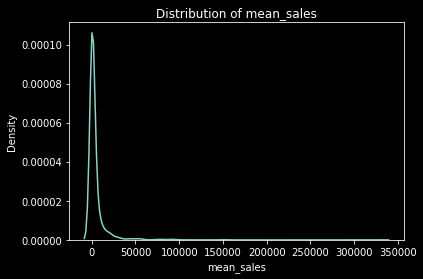

In [55]:
sns.kdeplot(df1_['mean_sales'])
plt.style.use(['dark_background'])
plt.title("Distribution of mean_sales")
plt.show()

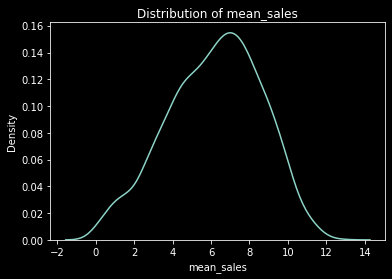

In [9]:
# 종속변수를 로그로 변환하였을 때 정규분포와 비슷한 형태로 변환되었으므로 
sns.kdeplot(np.log1p(df1_['mean_sales']))
plt.title("Distribution of mean_sales")
plt.style.use(['dark_background'])
plt.show()

In [10]:
#스케일링 함수 정의
scaler = MinMaxScaler()
#확진자 수 로그 변환
df1_['mean_sales'] = np.log1p(df1_['mean_sales'])
df1_[df1_.columns.values[:]] = scaler.fit_transform(df1_[df1_.columns.values[:]])

In [11]:
df1_data = df1_[df1_.columns.values[:]]
df1_data

,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,rpr_per_gender_m,...,age70_ratio,indcd_d_yn,indcd_f_yn,indcd_l_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,mean_sales
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005155,0.000000,0.004566,0.005952,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227703
1,0.000000,0.0,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.005952,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.487125
2,0.012346,0.0,0.021277,0.000000,0.000000,0.000000,0.020619,0.000000,0.013699,0.023810,...,0.0255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615551
3,0.006173,0.0,0.000000,0.016129,0.000000,0.064516,0.000000,0.000000,0.013699,0.000000,...,0.0024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504881
4,0.046296,0.0,0.021277,0.032258,0.090909,0.064516,0.041237,0.000000,0.059361,0.047619,...,0.0082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.673964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,0.000000,0.0,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.004566,0.000000,...,0.0650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207264
2253,0.003086,0.0,0.000000,0.000000,0.000000,0.032258,0.005155,0.000000,0.009132,0.011905,...,0.2386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268990
2254,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005155,0.000000,0.000000,0.005952,...,0.0567,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556097
2255,0.003086,0.0,0.021277,0.000000,0.000000,0.000000,0.005155,0.000000,0.004566,0.011905,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318472


In [12]:
#bias 추가
df1_data = sm.add_constant(df1_data, has_constant='add')
df1_data

,const,ws_cnt,found_age_1,found_age_2,found_age_3,found_age_4,found_age_5,found_age_6,runout_cnt,smbiz_yn_cnt,...,age70_ratio,indcd_d_yn,indcd_f_yn,indcd_l_yn,indcd_n_yn,indcd_o_yn,indcd_p_yn,indcd_q_yn,indcd_r_yn,mean_sales
0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005155,0.000000,0.004566,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227703
1,1.0,0.000000,0.0,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.487125
2,1.0,0.012346,0.0,0.021277,0.000000,0.000000,0.000000,0.020619,0.000000,0.013699,...,0.0255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.615551
3,1.0,0.006173,0.0,0.000000,0.016129,0.000000,0.064516,0.000000,0.000000,0.013699,...,0.0024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.504881
4,1.0,0.046296,0.0,0.021277,0.032258,0.090909,0.064516,0.041237,0.000000,0.059361,...,0.0082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.673964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2252,1.0,0.000000,0.0,0.000000,0.000000,0.030303,0.000000,0.000000,0.000000,0.004566,...,0.0650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.207264
2253,1.0,0.003086,0.0,0.000000,0.000000,0.000000,0.032258,0.005155,0.000000,0.009132,...,0.2386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268990
2254,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.005155,0.000000,0.000000,...,0.0567,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.556097
2255,1.0,0.003086,0.0,0.021277,0.000000,0.000000,0.000000,0.005155,0.000000,0.004566,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318472


In [13]:
feature_columns = list(df1_data.columns.difference(['mean_sales']))
X = df1_data[feature_columns]
y = df1_data.mean_sales
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1579, 38) (678, 38) (1579,) (678,)


In [14]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [15]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mean_sales   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     30.00
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          1.31e-134
Time:                        15:05:34   Log-Likelihood:                 751.26
No. Observations:                1579   AIC:                            -1439.
Df Residuals:                    1547   BIC:                            -1267.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
age10_ratio               -0.0198      0.070     -0.284      0.777      -0.157       0.117
age20_ratio                0.0625      0.045      1.404      0.161      -0.025       0.150
age30_ratio                0.0170      0.030      0.574      0.566      -0.041       0.075
age40_ratio                0.0628      0.027      2.320      0.020       0.010       0.116
age50_ratio                0.0289      0.031      0.938      0.348      -0.031       0.089
age60_ratio                0.0425      0.044      0.957      0.339      -0.045       0.130
age70_ratio                0.2199      0.070      3.127      0.002       0.082       0.358
const                      0.3821      0.016     23.263      0.000       0.350       0.414
found_age_1               -0.0478      0.082     -0.582      0.561      -0.209       0.113
found_age_2               -0.2162      0.135     -1.604      0.109      -0.481       0.048
found_age_3                0.1644      0.148      1.112      0.266      -0.126       0.454
found_age_4                0.0428      0.110      0.389      0.697      -0.173       0.259
found_age_5                0.1063      0.127      0.838      0.402      -0.143       0.355
found_age_6                0.3042      0.160      1.907      0.057      -0.009       0.617
indcd_d_yn             -2.492e-16   1.62e-16     -1.542      0.123   -5.66e-16    6.78e-17
indcd_f_yn                 0.0273      0.023      1.180      0.238      -0.018       0.073
indcd_l_yn                 0.0150      0.028      0.527      0.598      -0.041       0.071
indcd_n_yn                -0.0026      0.014     -0.192      0.848      -0.030       0.024
indcd_o_yn               2.69e-16   1.14e-16      2.351      0.019    4.46e-17    4.93e-16
indcd_p_yn                 0.0920      0.011      8.005      0.000       0.069       0.114
indcd_q_yn                 0.0881      0.014      6.080      0.000       0.060       0.117
indcd_r_yn                 0.0933      0.013      7.159      0.000       0.068       0.119
rpr_per_age_bin_10         0.0270      0.058      0.466      0.641      -0.087       0.141
rpr_per_age_bin_20         0.1827      0.111      1.651      0.099      -0.034       0.400
rpr_per_age_bin_30to50     0.0658      0.138      0.478      0.633      -0.204       0.336
rpr_per_age_bin_50over     0.4824      0.189      2.558      0.011       0.112       0.852
rpr_per_gender_f           0.0779      0.199      0.392      0.695      -0.312       0.468
rpr_per_gender_m           0.2937      0.187      1.568      0.117      -0.074       0.661
runout_cnt                 0.0113      0.105      0.108      0.914      -0.194       0.217
smbiz_yn_cnt              -1.0995      0.445     -2.469      0.014      -1.973      -0.226
sme_loan_cnt               0.1307      0.086      1.515      0.130      -0.039  

In [16]:
#다중공선성 제거를 위해 VIF값을 확인
#VIF Factor 값이 10 이상 되는 독립변수들은 drop

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df1_data.values, i) for i in range(df1_data.shape[1])]
vif['features'] = df1_data.columns
vif.head(60)

/opt/app-root/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/app-root/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/app-root/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,0.000000,const
1,inf,ws_cnt
2,inf,found_age_1
3,inf,found_age_2
4,inf,found_age_3
5,inf,found_age_4
6,inf,found_age_5
7,inf,found_age_6
8,inf,runout_cnt
9,102.256210,smbiz_yn_cnt


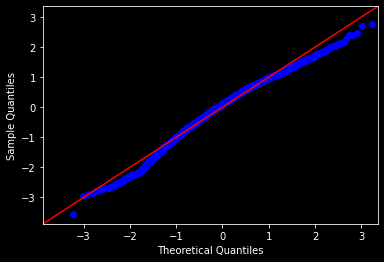

In [17]:
# 학습 데이터 잔차
res = fitted_full_model.resid
pred_y = fitted_full_model.predict(train_x)
# q-q plot / 정규분포 확인
fig = sm.qqplot(res, fit=True, line='45')

In [18]:
# 검증 데이터에 대한 예측
pred_y = fitted_full_model.predict(test_x)
pred_y

229     0.594116
1966    0.428868
859     0.516493
240     0.835769
410     0.426601
          ...   
1700    0.432860
1214    0.503437
688     0.617231
1839    0.416547
242     0.618242
Length: 678, dtype: float64

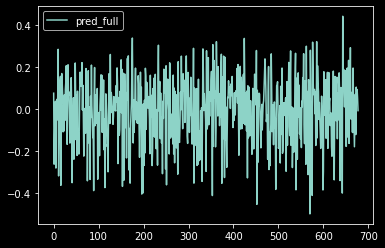

In [19]:
# 잔차 plot
plt.plot(np.array(test_y-pred_y), label = 'pred_full')
plt.legend()
plt.show()

In [20]:
## MSE 성능
mean_squared_error(y_true=test_y, y_pred=pred_y)

0.02426510576826717

In [21]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit() #모델 학습  
    AIC = regr.aic #모델의 AIC
    return{'model':regr, 'AIC':AIC}

print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc21e099ef0>, 'AIC': -308.4928747975591}


In [22]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fc21e0f9710>,
 'AIC': -1438.5152513059893}

In [23]:
#전진선택법(step=1)
def foward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y=y, feature_set=predictors+[p]+['const']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)

    #AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:', best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


In [24]:
#전진선택법 모델
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const']))+1):
        Forward_result = foward(X=X, y=y, predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])


In [25]:
Forward_best_model = forward_model(X=train_x, y=train_y)  

Processed  37 models on 1 predictors in 0.11748600006103516
Selected predictors: ['ws_cnt', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc21e0cbcc0>
Processed  36 models on 2 predictors in 0.0583188533782959
Selected predictors: ['ws_cnt', 'indcd_p_yn', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc21e0a8160>
Processed  35 models on 3 predictors in 0.051329851150512695
Selected predictors: ['ws_cnt', 'indcd_p_yn', 'indcd_r_yn', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc21e0a87f0>
Processed  34 models on 4 predictors in 0.05965256690979004
Selected predictors: ['ws_cnt', 'indcd_p_yn', 'indcd_r_yn', 'indcd_q_yn', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc21e1182b0>
Processed  33 models on 5 predictors in 1.0596940517425537
Selected predictors: ['ws_cnt', 'indcd_p_yn', 'indcd_r_yn', 'indcd_q_yn', 'sm

In [26]:
Forward_best_model.aic

-1470.0307288202503

In [27]:
Forward_best_model.summary()

/opt/app-root/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mean_sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     92.61
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          2.83e-150
Time:                        15:05:51   Log-Likelihood:                 746.02
No. Observations:                1579   AIC:                            -1470.
Df Residuals:                    1568   BIC:                            -1411.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ws_cnt                     3.0412      0.657      4.629      0.000       1.753       4.330
indcd_p_yn                 0.0918      0.011      8.222      0.000       0.070       0.114
indcd_r_yn                 0.0962      0.013      7.558      0.000       0.071       0.121
indcd_q_yn                 0.0876      0.014      6.197      0.000       0.060       0.115
smbiz_yn_cnt              -0.9590      0.329     -2.912      0.004      -1.605      -0.313
age70_ratio                0.1991      0.068      2.935      0.003       0.066       0.332
rpr_per_age_bin_30to50    -1.8168      0.597     -3.045      0.002      -2.987      -0.646
found_age_2               -0.2420      0.108     -2.242      0.025      -0.454      -0.030
sme_loan_cnt               0.5488      0.298      1.844      0.065      -0.035       1.133
age40_ratio                0.0446      0.025      1.800      0.072      -0.004       0.093
indcd_d_yn                      0          0        nan        nan           0           0
indcd_o_yn                      0          0        nan        nan           0           0
const                      0.4123      0.008     52.124      0.000       0.397       0.428
==============================================================================
Omnibus:                       54.736   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.908
Skew:                          -0.477   Prob(JB):                     9.80e-14
Kurtosis:                       3.021   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
#후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y=y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in", (toc - tic))
    print('Selected predictors:', best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model


In [29]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while(len(predictors)>1):
        Backward_result = backward(X=train_x, y=train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors)-1] = Backward_result
        predictors = Bmodels.loc[len(predictors)-1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [30]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  37 models on 36 predictors in 4.095674276351929
Selected predictors: ['age10_ratio', 'age20_ratio', 'age30_ratio', 'age40_ratio', 'age50_ratio', 'age60_ratio', 'age70_ratio', 'found_age_1', 'found_age_2', 'found_age_3', 'found_age_4', 'found_age_5', 'found_age_6', 'indcd_d_yn', 'indcd_f_yn', 'indcd_l_yn', 'indcd_o_yn', 'indcd_p_yn', 'indcd_q_yn', 'indcd_r_yn', 'rpr_per_age_bin_10', 'rpr_per_age_bin_20', 'rpr_per_age_bin_30to50', 'rpr_per_age_bin_50over', 'rpr_per_gender_f', 'rpr_per_gender_m', 'runout_cnt', 'smbiz_yn_cnt', 'sme_loan_cnt', 'sme_loan_y_1', 'sme_loan_y_2', 'sme_loan_y_3', 'sme_loan_y_4', 'sme_loan_y_5', 'sme_loan_y_6', 'ws_cnt', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc21e0817f0>
Processed  36 models on 35 predictors in 3.401139497756958
Selected predictors: ['age20_ratio', 'age30_ratio', 'age40_ratio', 'age50_ratio', 'age60_ratio', 'age70_ratio', 'found_age_1', 'found_age_2', 'found_age_3', 'found_age_4', 'fou

In [31]:
Backward_best_model.aic

-1468.2839023249817

In [32]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mean_sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     84.18
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          2.47e-149
Time:                        15:06:42   Log-Likelihood:                 746.14
No. Observations:                1579   AIC:                            -1468.
Df Residuals:                    1567   BIC:                            -1404.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
age40_ratio                0.0449      0.025      1.812      0.070      -0.004       0.094
age70_ratio                0.2004      0.068      2.951      0.003       0.067       0.334
found_age_2               -0.2769      0.127     -2.176      0.030      -0.526      -0.027
indcd_p_yn                 0.0916      0.011      8.199      0.000       0.070       0.114
indcd_q_yn                 0.0876      0.014      6.199      0.000       0.060       0.115
indcd_r_yn                 0.0961      0.013      7.539      0.000       0.071       0.121
rpr_per_age_bin_20         0.2286      0.101      2.254      0.024       0.030       0.428
rpr_per_age_bin_30to50     0.8024      0.470      1.708      0.088      -0.119       1.724
rpr_per_age_bin_50over     0.7867      0.177      4.454      0.000       0.440       1.133
smbiz_yn_cnt              -0.9604      0.329     -2.919      0.004      -1.606      -0.315
sme_loan_cnt               0.5490      0.298      1.844      0.065      -0.035       1.133
const                      0.4028      0.008     50.760      0.000       0.387       0.418
==============================================================================
Omnibus:                       54.226   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.317
Skew:                          -0.475   Prob(JB):                     1.32e-13
Kurtosis:                       3.011   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X,y,predictors+['const'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const']))+1):
        Forward_result = foward(X=X, y=y, predictors=predictors) # constant added
        print('foward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']<Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC']>Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return(Stepmodels['model'][len(Stepmodels['model'])])

In [34]:
Stepwise_best_model = Stepwise_model(X=train_x,y=train_y)

Processed  37 models on 1 predictors in 0.09290385246276855
Selected predictors: ['ws_cnt', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc2187fd208>
foward
Processed  1 models on 0 predictors in 0.0028290748596191406
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc21e08ee48>
Processed  36 models on 2 predictors in 0.06386899948120117
Selected predictors: ['ws_cnt', 'indcd_p_yn', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc2187fde80>
foward
Processed  2 models on 1 predictors in 0.00567173957824707
Selected predictors: ['ws_cnt', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fc2187fd2e8>
Processed  35 models on 3 predictors in 0.04867720603942871
Selected predictors: ['ws_cnt', 'indcd_p_yn', 'indcd_r_yn', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper objec

In [35]:
Stepwise_best_model.summary()

/opt/app-root/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             mean_sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     92.61
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          2.83e-150
Time:                        15:07:53   Log-Likelihood:                 746.02
No. Observations:                1579   AIC:                            -1470.
Df Residuals:                    1568   BIC:                            -1411.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ws_cnt                     3.0412      0.657      4.629      0.000       1.753       4.330
indcd_p_yn                 0.0918      0.011      8.222      0.000       0.070       0.114
indcd_r_yn                 0.0962      0.013      7.558      0.000       0.071       0.121
indcd_q_yn                 0.0876      0.014      6.197      0.000       0.060       0.115
smbiz_yn_cnt              -0.9590      0.329     -2.912      0.004      -1.605      -0.313
age70_ratio                0.1991      0.068      2.935      0.003       0.066       0.332
rpr_per_age_bin_30to50    -1.8168      0.597     -3.045      0.002      -2.987      -0.646
found_age_2               -0.2420      0.108     -2.242      0.025      -0.454      -0.030
sme_loan_cnt               0.5488      0.298      1.844      0.065      -0.035       1.133
age40_ratio                0.0446      0.025      1.800      0.072      -0.004       0.093
indcd_d_yn                      0          0        nan        nan           0           0
indcd_o_yn                      0          0        nan        nan           0           0
const                      0.4123      0.008     52.124      0.000       0.397       0.428
==============================================================================
Omnibus:                       54.736   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.908
Skew:                          -0.477   Prob(JB):                     9.80e-14
Kurtosis:                       3.021   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
# 성능평가
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)


(13,) (12,) (13,)


In [37]:
pred_y_full = fitted_full_model.predict(test_x)
pred_y_foward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])


In [38]:
perf_mat = pd.DataFrame(columns=["ALL", "FOWARD", "BACKWARD", "STEPWISE"], index = ['MSE', 'RMSE', 'MAE', 'MAPE'])

In [39]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
from sklearn import metrics

In [40]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y, pred_y_full)
perf_mat.loc['MSE']['FOWARD'] = metrics.mean_squared_error(test_y, pred_y_foward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y, pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y, pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FOWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_foward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FOWARD'] = metrics.mean_absolute_error(test_y, pred_y_foward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FOWARD'] = mean_absolute_percentage_error(test_y, pred_y_foward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)


            ALL    FOWARD   BACKWARD  STEPWISE
MSE   0.0242651   0.02436  0.0243852   0.02436
RMSE   0.155773  0.156077   0.156158  0.156077
MAE    0.123994  0.124008   0.124051  0.124008
MAPE        inf       inf        inf       inf


/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

38
13
12
13


## 새로운 회귀분석 & 독립변수 간의 상관분석

In [42]:

X = df1_data[[ 'indcd_p_yn', 'indcd_r_yn', 'indcd_q_yn', 'sme_loan_y_6',
             'indcd_f_yn', 'smbiz_yn_cnt', 'rpr_per_age_bin_20', 'sme_loan_y_3', 'rpr_per_age_bin_50over']]

y = df1_data.mean_sales
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1579, 9) (678, 9) (1579,) (678,)


In [43]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             mean_sales   R-squared (uncentered):                   0.465
Model:                            OLS   Adj. R-squared (uncentered):              0.462
Method:                 Least Squares   F-statistic:                              151.4
Date:                Thu, 28 Jan 2021   Prob (F-statistic):                   7.27e-206
Time:                        15:07:53   Log-Likelihood:                         -722.04
No. Observations:                1579   AIC:                                      1462.
Df Residuals:                    1570   BIC:                                      1510.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
indcd_p_yn                 0.4109      0.026     15.615      0.000       0.359       0.462
indcd_r_yn                 0.2749      0.031      8.821      0.000       0.214       0.336
indcd_q_yn                 0.1800      0.037      4.898      0.000       0.108       0.252
sme_loan_y_6               1.1186      0.306      3.661      0.000       0.519       1.718
indcd_f_yn                 0.1591      0.056      2.834      0.005       0.049       0.269
smbiz_yn_cnt              -1.6876      0.431     -3.915      0.000      -2.533      -0.842
rpr_per_age_bin_20         0.1096      0.216      0.508      0.611      -0.313       0.533
sme_loan_y_3               0.7801      0.276      2.824      0.005       0.238       1.322
rpr_per_age_bin_50over     1.9230      0.396      4.856      0.000       1.146       2.700
==============================================================================
Omnibus:                      173.428   Durbin-Watson:                   0.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              246.142
Skew:                          -0.829   Prob(JB):                     3.56e-54
Kurtosis:                       3.995   Cond. No.                         36.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 상관관계 분석

<AxesSubplot:>

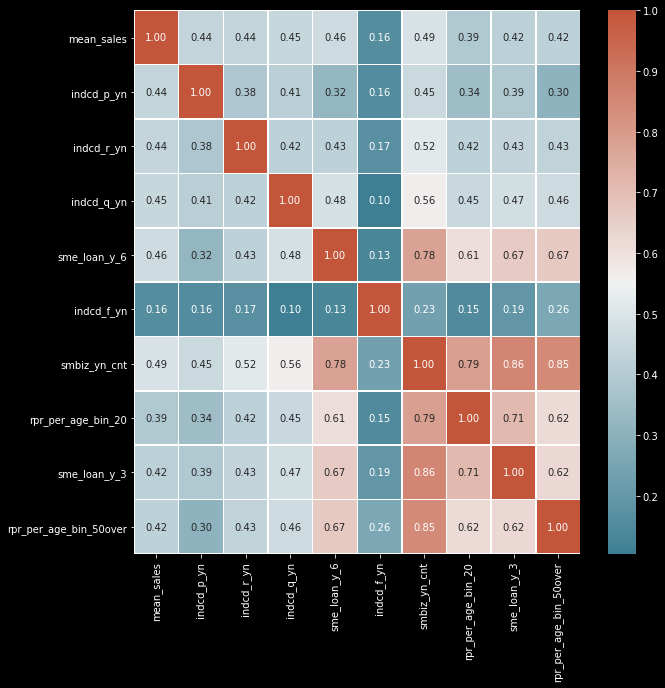

In [44]:
variable_corr = df1_data[['mean_sales','indcd_p_yn', 'indcd_r_yn', 'indcd_q_yn', 'sme_loan_y_6',
             'indcd_f_yn', 'smbiz_yn_cnt', 'rpr_per_age_bin_20', 'sme_loan_y_3', 'rpr_per_age_bin_50over']]
plt.figure(figsize=(10,10))
sns.heatmap(data = variable_corr.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(220,20,as_cmap=True))

### 결과해석
상관분석의 결과로 의미있는 관계로는
소상공인 && 대표자가 20대인 사업체 수 간의 관계가 양의 상관관계를 보이고,
업종 r(학문&교육), 업종 p(스포츠)가 회귀식에서 양의 계수를 가져 격자 내의 매출에 영향을 끼치는 반면, 음의 계수를 가지는 격자 내 소상공인의 수는 업종r(학문,교육) 업종p(스포츠)와 음의 상관관계를 가지는 것으로 확인되었다.

### 이에 우리 팀은 소상공인과 업종변수간의 상관관계를 파악해 격자 내 소상공인 점포 수와 격자 내 존재하는 업종과의 상관관계를 조사해 소상공인의 창업 경향을 알아보고자 하였다.

## mean_sales

<AxesSubplot:>

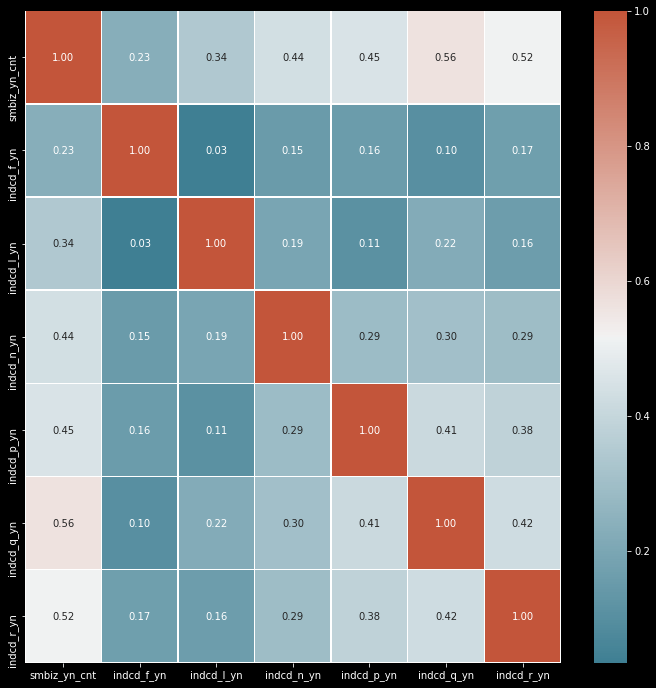

In [45]:
variable_corr = df1_data[['smbiz_yn_cnt',  'indcd_f_yn'
                         ,  'indcd_l_yn', 'indcd_n_yn'
                         ,  'indcd_p_yn', 'indcd_q_yn', 'indcd_r_yn']]
plt.figure(figsize=(12,12))
sns.heatmap(data = variable_corr.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap=sns.diverging_palette(220,20,as_cmap=True))

In [46]:
df3=csv2.drop_duplicates(['대분류코드'])
df3

,대분류코드,대분류명,중분류코드,중분류명,소분류코드,소분류명
0,Q,음식,Q05,닭/오리요리,Q05A01,삼계탕전문
117,F,생활서비스,F12,광고/인쇄,F12A07,생활정보제공서비스
278,D,소매,D03,종합소매점,D03B09,어판장
534,N,관광/여가/오락,N06,전시/관람,N06B09,문화원
598,P,스포츠,P02,실내운동시설,P02A22,석궁장
646,R,학문/교육,R03,학원-자격/국가고시,R03A14,학원-자동차정비
814,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙
819,L,부동산,L02,부동산임대,L02A01,임대-사무실/오피스텔/공장


R : 학문,교육, Q : 음식 에 해당하는 업종의 창업에 도전하는 소상공인이 많은 것을 확인할 수 있다.
P : 스포츠, N : 관광, 여가, 오락, L : 부동산, F : 생활서비스에 대해서는 소상공인 수와 상대적으로 작은 상관관계를 보인다.